# Obesity Risk Prediction Model
This notebook develops a classification model to predict individuals at high risk for obesity based on demographic and lifestyle features. It includes data loading, preprocessing, exploratory data analysis, model training, and evaluation.

### Dataset Information

The *Obesity Levels*$\text{}^{1}$ dataset observed includes estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

This dataset contains the following columns:

| Column                        | Type        | Data Type   | Description                                                                                   |
|-------------------------------|-------------|-------------|-----------------------------------------------------------------------------------------------|
| **Gender**                    | Feature     | Categorical | "Gender"                                                                                      |
| **Age**                       | Feature     | Continuous  | "Age"                                                                                         |
| **Height**                    | Feature     | Continuous  | Height                                                                                        |
| **Weight**                    | Feature     | Continuous  | Weight                                                                                        |
| **family_history_with_overweight** | Feature | Binary      | "Has a family member suffered or suffers from overweight?"                                    |
| **FAVC**                      | Feature     | Binary      | "Do you eat high caloric food frequently?"                                                    |
| **FCVC**                      | Feature     | Integer     | "Do you usually eat vegetables in your meals?"                                                |
| **NCP**                       | Feature     | Continuous  | "How many main meals do you have daily?"                                                      |
| **CAEC**                      | Feature     | Categorical | "Do you eat any food between meals?"                                                          |
| **SMOKE**                     | Feature     | Binary      | "Do you smoke?"                                                                               |
| **CH2O**                      | Feature     | Continuous  | "How much water do you drink daily?"                                                          |
| **SCC**                       | Feature     | Binary      | "Do you monitor the calories you eat daily?"                                                  |
| **FAF**                       | Feature     | Continuous  | "How often do you have physical activity?"                                                    |
| **TUE**                       | Feature     | Integer     | "How much time do you use technological devices such as cell phone, videogames, television, computer and others?" |
| **CALC**                      | Feature     | Categorical | "How often do you drink alcohol?"                                                             |
| **MTRANS**                    | Feature     | Categorical | "Which transportation do you usually use?"                                                    |
| **NObeyesdad**                | Target      | Categorical | "Obesity level"                                                                               |


## 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, accuracy_score
from statsmodels.stats import anova
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR
from IPython.display import display, HTML
import itertools

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 2. Load Data
Load the dataset and examine the first few rows.

In [8]:
data_raw = pd.read_csv('ObesityDataSet_raw.csv')
data_raw.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
# Print shape of the dataset
data_raw.shape

(2111, 17)

In [10]:
# Print information of the dataset.
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## 3. Data Preprocessing
Convert categorical features to numeric, handle missing values, and scale numerical features.

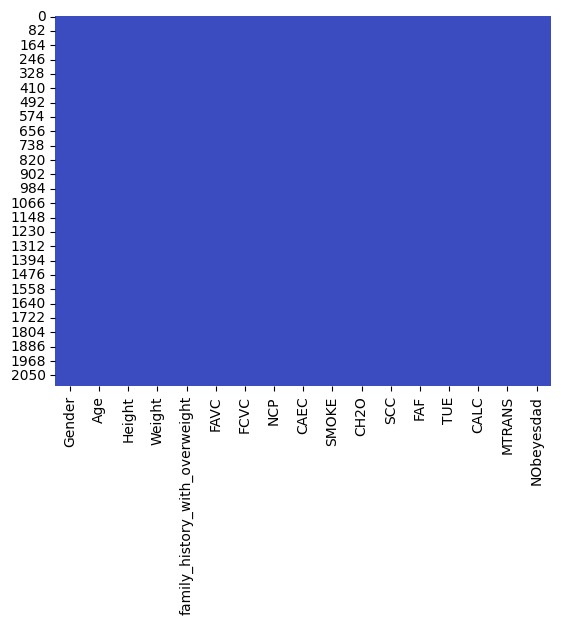

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [12]:
# heatmpa of the dataset, blue = data red = missing data
sns.heatmap(data_raw.isnull(), cbar=False, cmap="coolwarm")
plt.show() # show heatmap
print(data_raw.isnull().sum())  # display the count of missing values for each column
# Drop missing values
#data = data_raw.dropna()
data = data_raw

In [13]:
# Encode categorical features
label_encoders = {}
# Dictionary to store the relationship between original and encoded values
value_mapping = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    # Store the mapping of original values to encoded values
    value_mapping[column] = dict(zip(le.classes_, range(len(le.classes_))))
    #Then, proceed with the replacement.
    label_encoders[column] = le

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [14]:
def printMappedValues(MyDictionary):
    for column, mapping in MyDictionary.items():
        # Create an HTML table for each column's mapping
        resultText = ''
        
        # Add rows for each mapping in the dictionary
        for original, encoded in mapping.items():
            resultText += f'- {original}: {encoded}\n'
        
        resultText += '-------------------------'
        
        # Print the HTML table for the current column
        print(f'Values for column: {column}:')
        print(resultText)
        print('\n')  # Add space between tables for readability
printMappedValues(value_mapping)

Values for column: Gender:
- Female: 0
- Male: 1
-------------------------


Values for column: family_history_with_overweight:
- no: 0
- yes: 1
-------------------------


Values for column: FAVC:
- no: 0
- yes: 1
-------------------------


Values for column: CAEC:
- Always: 0
- Frequently: 1
- Sometimes: 2
- no: 3
-------------------------


Values for column: SMOKE:
- no: 0
- yes: 1
-------------------------


Values for column: SCC:
- no: 0
- yes: 1
-------------------------


Values for column: CALC:
- Always: 0
- Frequently: 1
- Sometimes: 2
- no: 3
-------------------------


Values for column: MTRANS:
- Automobile: 0
- Bike: 1
- Motorbike: 2
- Public_Transportation: 3
- Walking: 4
-------------------------


Values for column: NObeyesdad:
- Insufficient_Weight: 0
- Normal_Weight: 1
- Obesity_Type_I: 2
- Obesity_Type_II: 3
- Obesity_Type_III: 4
- Overweight_Level_I: 5
- Overweight_Level_II: 6
-------------------------




### Data Encoding

| Column                         | Encodings                                                      |
|--------------------------------|----------------------------------------------------------------|
| **Gender**                     | Female: 0; Male: 1                                             |
| **family_history_with_overweight** | no: 0; yes: 1                                         |
| **FAVC**                       | no: 0; yes: 1                                                  |
| **CAEC**                       | Always: 0; Frequently: 1; Sometimes: 2; no: 3                  |
| **SMOKE**                      | no: 0; yes: 1                                                  |
| **SCC**                        | no: 0; yes: 1                                                  |
| **CALC**                       | Always: 0; Frequently: 1; Sometimes: 2; no: 3                  |
| **MTRANS**                     | Automobile: 0; Bike: 1; Motorbike: 2; Public_Transportation: 3; Walking: 4 |
| **NObeyesdad**                 | Insufficient_Weight: 0; Normal_Weight: 1; Obesity_Type_I: 2; Obesity_Type_II: 3; Obesity_Type_III: 4; Overweight_Level_I: 5; Overweight_Level_II: 6 |


## 4. Exploratory Data Analysis (EDA)
Explore the distribution of obesity levels and visualize relationships between features.

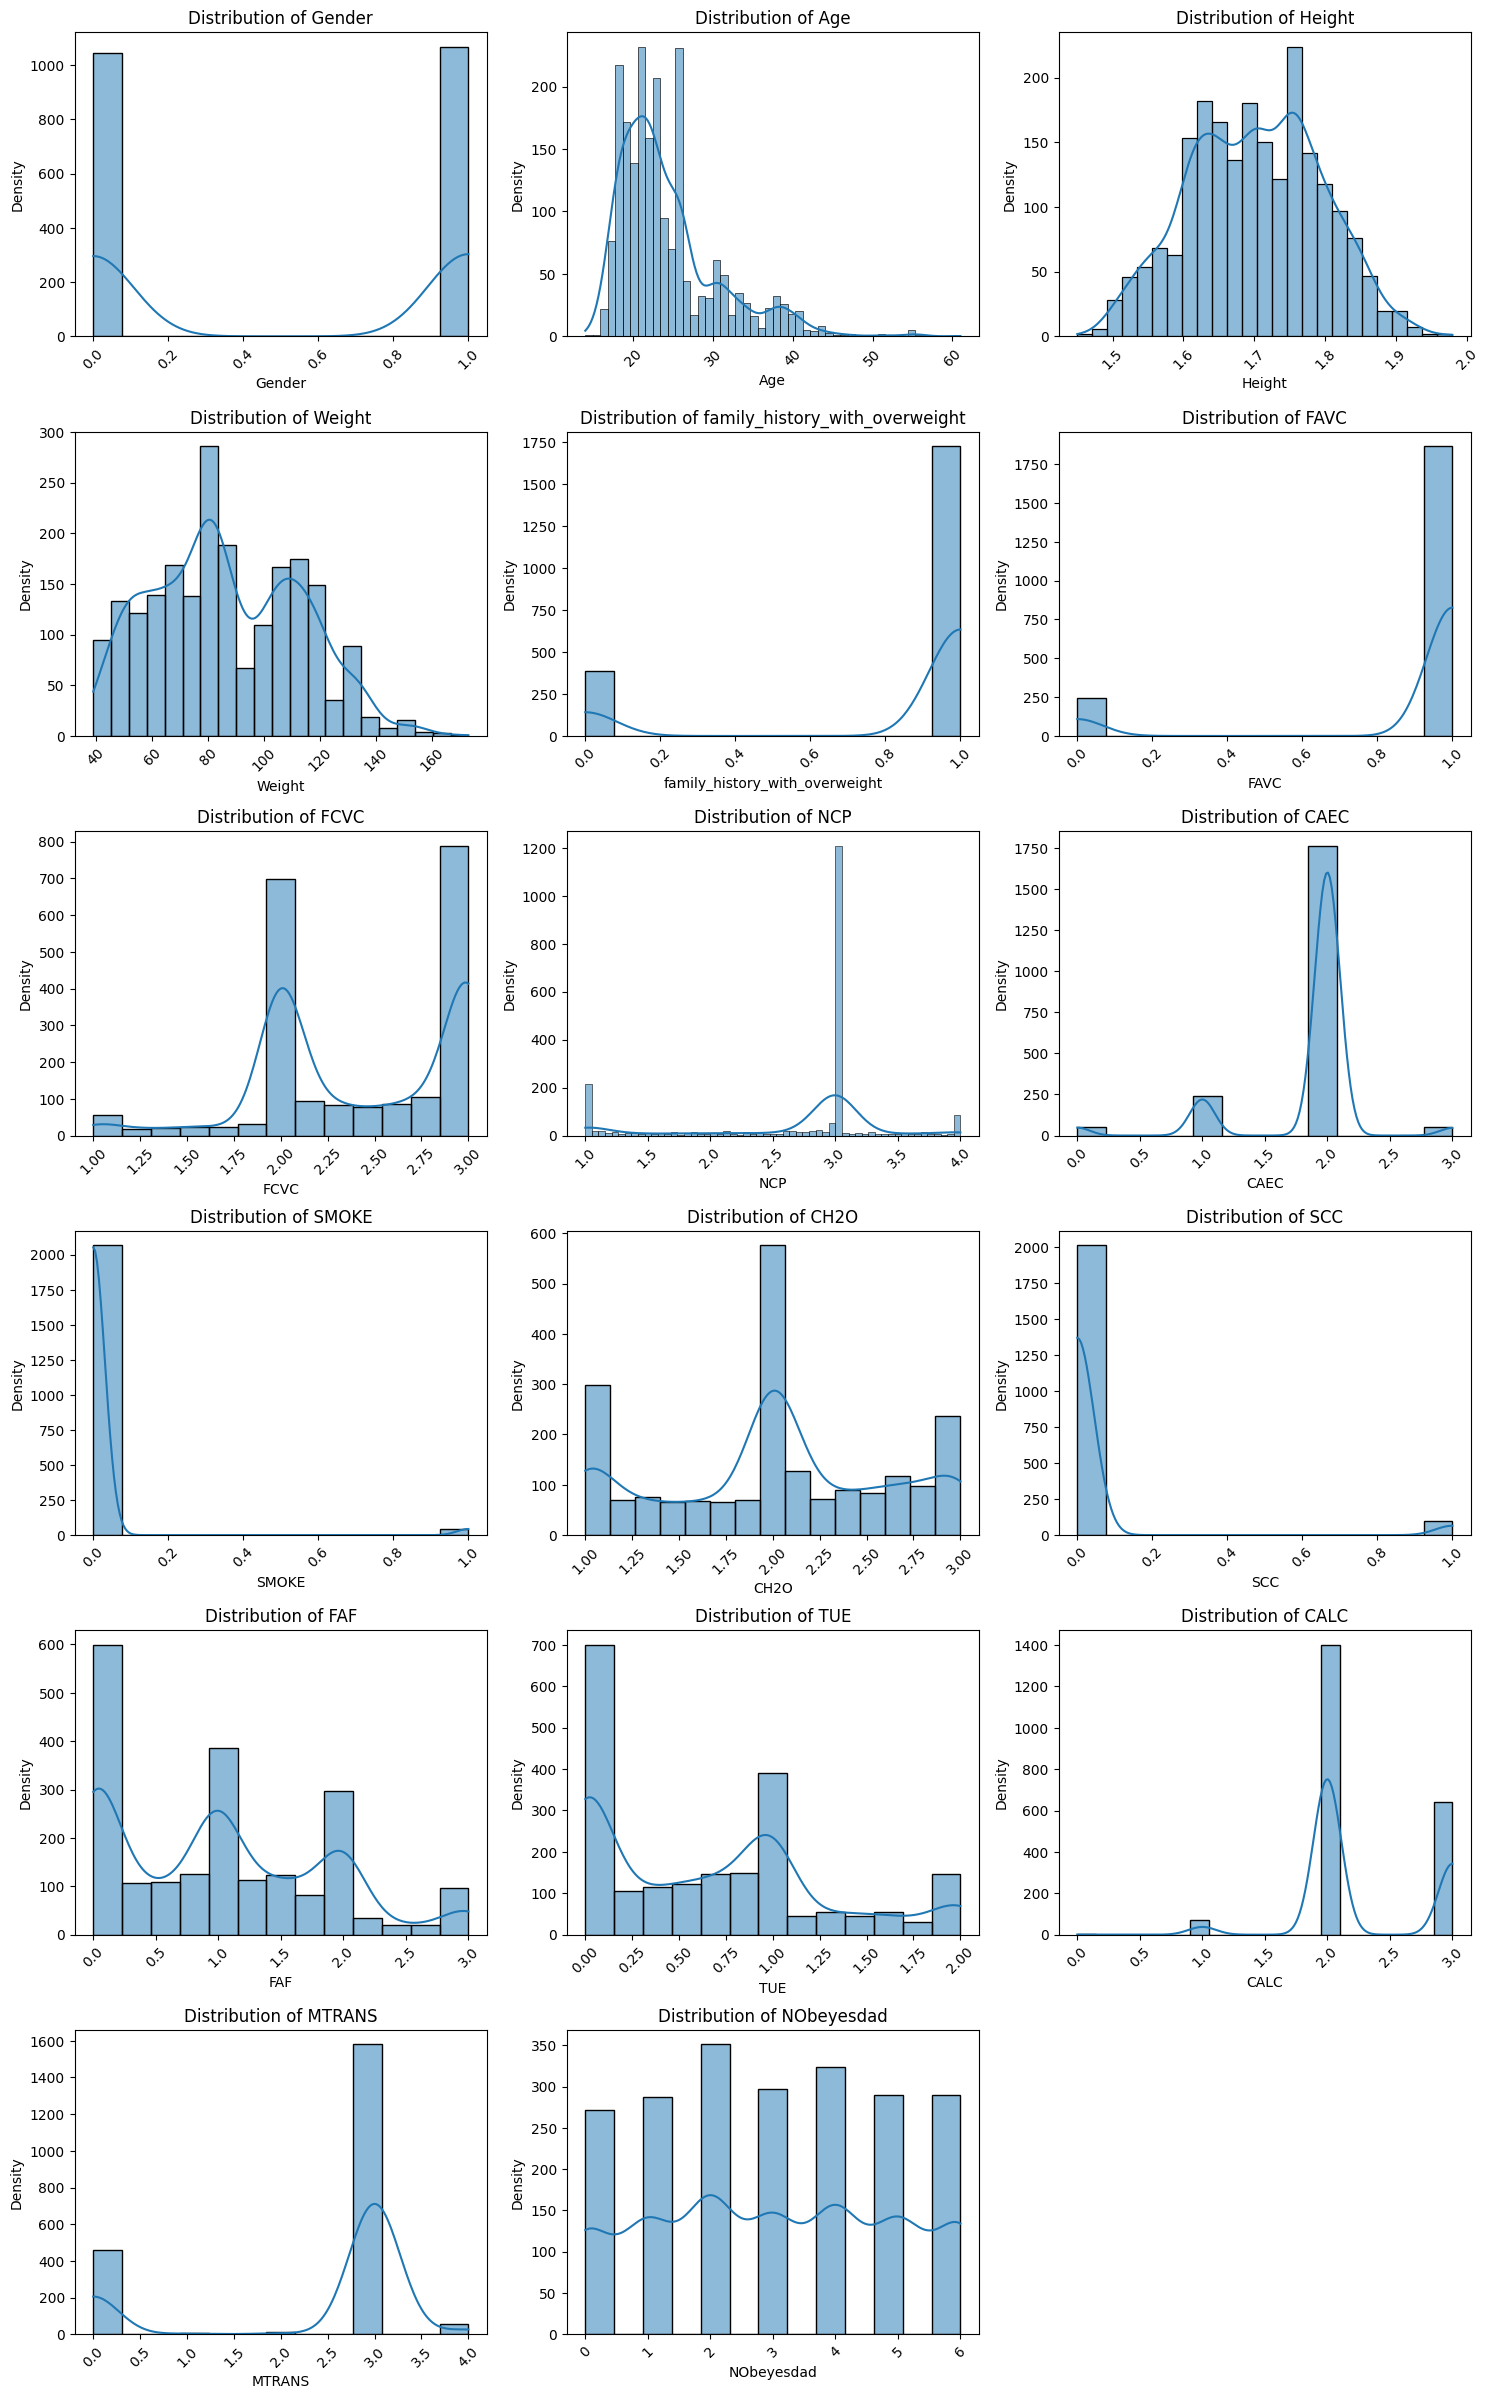

In [18]:
# Set up the number of columns for the grid
num_cols = 3
num_vars = len(data_raw.columns)
num_rows = (num_vars + num_cols - 1) // num_cols  # Calculate required number of rows

# Create a grid of subplots for all variables
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, column in enumerate(data_raw.columns):
    ax = axes[i]
    if data_raw[column].dtype == 'object':  # Plot count plot for categorical variables
        sns.countplot(x=column, data=data_raw, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate labels for count plot
    else:
        # Plot histogram for numerical variables
        sns.histplot(data_raw[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.tick_params(axis='x', rotation=45)  # Rotate labels for histogram

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

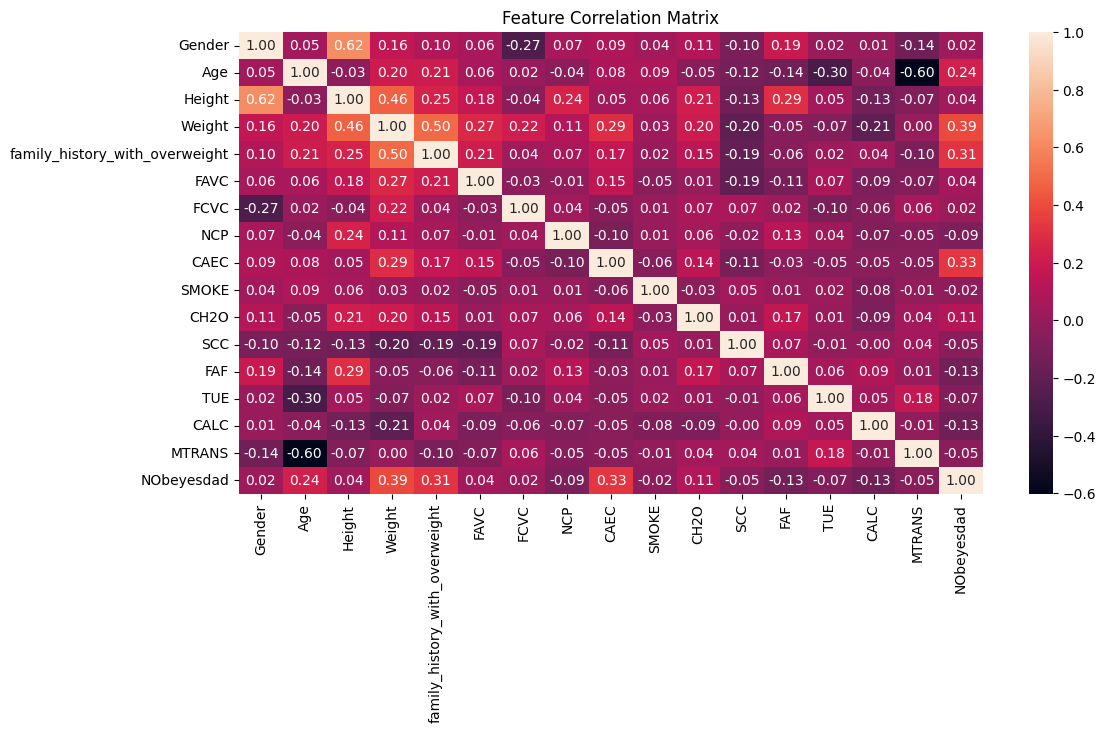

In [19]:
# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

## 5. Train-Test Split
Split the data into training and testing sets.

In [89]:
# TODO: Select refine features selections. Currently all features are being considered. 
RANDOM_SEED = 123 #42 # Define our random seed

X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Splits the data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X,                          # Features variables
                                                    y,                          # Target variable
                                                    test_size=0.25,             # 25% of the data for test 
                                                    random_state=RANDOM_SEED)   # Set random seed

In [91]:
# Standardize training/test data
# Standarizing data after splitting to avoid information leakage
scaler = StandardScaler() 
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

## 6. Model Training
Train multiple models and compare performance.

In [24]:
# create a function for our confusion matrix 
def plot_confusion_matrix(_true, _pred, classes, cmap='Blues', title=''):
    cm = confusion_matrix(_true, _pred) # set our confusion matrix true and predicted values

    # display our confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.title(title)
    plt.show()

### Random Forest Classifier

Accuracy: 0.9431818181818182


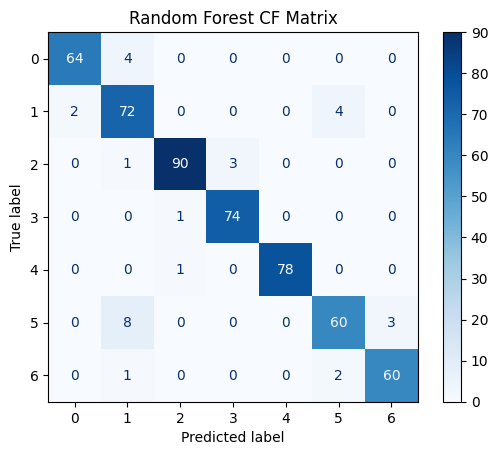

In [26]:
# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)
rf_model.fit(X_train_scale, y_train)

# Make predictions on the test set
rf_prediction = rf_model.predict(X_test_scale)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(f'Accuracy: {rf_accuracy}')

# Calculate F1 score
rf_weighted_f1 = f1_score(y_test, rf_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, rf_prediction, rf_model.classes_, title='Random Forest CF Matrix')

### Support Vector Machine (SVM)

Accuracy: 0.8768939393939394


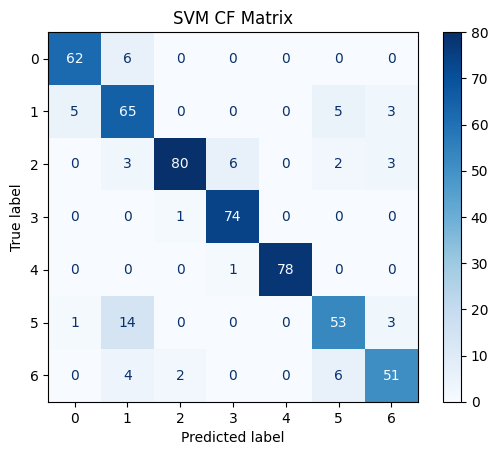

In [28]:
# Instantiate and train the SVM
svm_model = SVC(random_state=RANDOM_SEED)
svm_model.fit(X_train_scale, y_train)

# Make predictions on the test set
svm_prediction = svm_model.predict(X_test_scale)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_prediction)
print(f'Accuracy: {svm_accuracy}')

# Calculate F1 score
svm_weighted_f1 = f1_score(y_test, svm_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, svm_prediction, rf_model.classes_, title='SVM CF Matrix')

### Logistic Regression

Accuracy: 0.8617424242424242


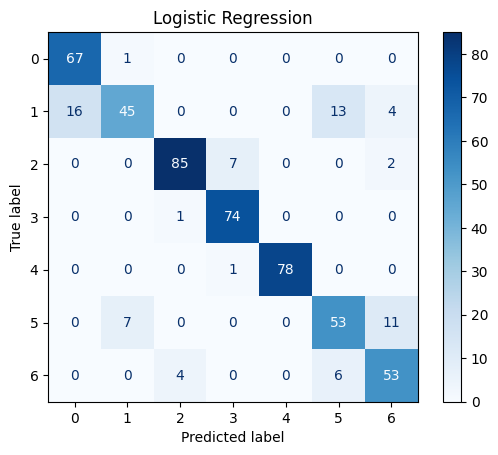

In [30]:
# Instantiate and train the Logistic Regression
lg_model = LogisticRegression(random_state=RANDOM_SEED)
lg_model.fit(X_train_scale, y_train)

# Make predictions on the test set
lg_prediction = lg_model.predict(X_test_scale)

# Calculate accuracy
lg_accuracy = accuracy_score(y_test, lg_prediction)
print(f'Accuracy: {lg_accuracy}')

# Calculate F1 score
lg_weighted_f1 = f1_score(y_test, lg_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, lg_prediction, rf_model.classes_, title='Logistic Regression')

### Decision Tree

Accuracy: 0.9147727272727273


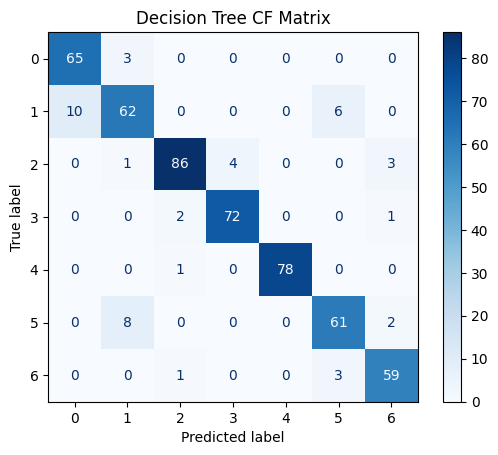

In [32]:
# Instantiate and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_model.fit(X_train_scale, y_train)

# Make predictions on the test set
dt_prediction = dt_model.predict(X_test_scale)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_prediction)
print(f'Accuracy: {dt_accuracy}')

# Calculate F1 score
dt_weighted_f1 = f1_score(y_test, dt_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, dt_prediction, rf_model.classes_, title='Decision Tree CF Matrix')

In [33]:
####################################################################################
#
#   Base Class for the ModelSelector
#
####################################################################################
class ModelSelector:
    def __init__(
        self,
        X,
        y,
        testingSize=0.2,
        randomSeed=42,
        validationSize=0.25,
        selectedModel="LinearRegression",
        selectedColumns = []
):
        '''
        Definition of parameters:
        X: Features
        y: Target column
        testingSize: Float number from 0 to 1 representing the percentage that will be assigned to the testing set
        randomSeed: Value for reproducibility in randomization (Random state)
        validationSize: Float number from 0 tp 1 representing the percentage that will be assigned to the validation set
        selectedModel: Model to be tested by the class.
        selectedColumns: The list of columns used for the analysis. By default it is an empty list that will be replaced by the full list of columns
        '''
        self.model_name = selectedModel
        self.selectedModels = {
            "LinearRegression": {
                "model": lambda X, y: LinearRegression(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "RandomForestClassifier": {
                "model": lambda X, y: RandomForestClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "DecisionTreeClassifier": {
                "model": lambda X, y: DecisionTreeClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "GradientBoostingClassifier": {
                "model": lambda X, y: GradientBoostingClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "AdaBoostClassifier": {
                "model": lambda X, y: AdaBoostClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "BaggingClassifier": {
                "model": lambda X, y: BaggingClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "OLS": {
                "model":lambda X, y: sm.OLS(y, X),
                "fit": lambda X, y: self.selectedModel.fit()
            },
            "SVC": {
                "model": lambda X, y: SVC(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "MLPClassifier": {
                "model": lambda X, y: MLPClassifier(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            },
            "LogisticRegression":{
                "model": lambda X, y: LogisticRegression(),
                "fit": lambda X, y: self.selectedModel.fit(X, y)
            }
        }
        if(len(selectedColumns)==0):
            selectedColumns = X.columns
        self.selectedColumns = selectedColumns
        self.X = X[selectedColumns]
        self.y = y
        self.testingSize = testingSize
        self.randomSeed = randomSeed
        self.validationSize = validationSize
        #self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
        #    self.X,
        #    self.y,
        #    test_size=self.testingSize,
        #    random_state=self.randomSeed
#)
        self.X_train = X_train_scale[selectedColumns]
        self.y_train = y_train
        self.X_test = X_test_scale[selectedColumns]
        self.y_test = y_test
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            self.X_train,
            self.y_train,
            test_size=self.validationSize,
            random_state=self.randomSeed
)
        self.selectedModel = self.selectedModels[self.model_name]['model'](self.X_train, self.y_train)

    @staticmethod
    def getAvailableModels():
        return [
            #"LinearRegression",
            "RandomForestClassifier",
            "DecisionTreeClassifier",
            "GradientBoostingClassifier",
            "AdaBoostClassifier",
            "BaggingClassifier",
            #"OLS",
            "SVC",
            "MLPClassifier",
            "LogisticRegression"
]

    def train(self):
        self.selectedModel=self.selectedModels[self.model_name]['fit'](self.X_train, self.y_train)
        return self.evaluate(self.X_train, self.y_train)

    def predict(self, X):
        return self.selectedModel.predict(X)
    
    def validate(self):
        return self.evaluate(self.X_val, self.y_val)
    
    def test(self):
        return self.evaluate(self.X_test, self.y_test)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        try:
            acc_score = accuracy_score(y, y_pred)
        except Exception as e:
            acc_score = 0
            #print(f'An exception has occurred with model {self.model_name}: {e}')
            #print(y.head())
            #print(y_pred[:5])
        return np.round((mse, mae, r2, acc_score), decimals=2)
    
    def summary(self):
        return self.selectedModel.summary()
    
    def plotResiduals(self, X, y):
        residuals = y - self.predict(X)
        sns.scatterplot(x=self.predict(X), y=residuals)
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Predicted Values vs. Residuals')
        plt.show()

    def plot_residuals(self):
        self.plotResiduals(self.X_val, self.y_val)
    
    def plot_residuals_test(self):
        self.plotResiduals(self.X_test, self.y_test)

    def plot_residuals_val(self):
        self.plotResiduals(self.X_val, self.y_val)

In [93]:
# Collect the data into a list of lists
resultsData = [['Model',
         'Train MSE',
         'Train MAE',
         'Train R²',
         'Train Accuracy',
         'Validation MSE',
         'Validation MAE',
         'Validation R²',
         'Validation Accuracy',
         'Test MSE',
         'Test MAE',
         'Test R²',
         'Test Accuracy'
]]

selected_columns = ['Height','Weight','FAVC','CH2O','TUE']

for modelName in ModelSelector.getAvailableModels():
    #currentModel = ModelSelector(X, y, selectedModel=modelName)
    currentModel = ModelSelector(X_train_scale[selected_columns], y_train, selectedModel=modelName)
    trainingResults = currentModel.train()
    validationResults = currentModel.validate()
    testingResults = currentModel.test()
    
    # Append each row of model results to the data list
    resultsData.append([modelName,
                 f'{trainingResults[0]:.4f}', f'{trainingResults[1]:.4f}', f'{trainingResults[2]:.4f}', f'{trainingResults[3]:.4f}', 
                 f'{validationResults[0]:.4f}', f'{validationResults[1]:.4f}', f'{validationResults[2]:.4f}', f'{validationResults[3]:.4f}',
                 f'{testingResults[0]:.4f}', f'{testingResults[1]:.4f}', f'{testingResults[2]:.4f}', f'{testingResults[3]:.4f}'])

#Printing the data
dfResultsData = pd.DataFrame(resultsData)

# Print DataFrame as an HTML table
html_ResultsData = dfResultsData.to_html()
display(HTML(html_ResultsData))


C:\ProgramData\anaconda3\envs\MSAAI500\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Model,Train MSE,Train MAE,Train R²,Train Accuracy,Validation MSE,Validation MAE,Validation R²,Validation Accuracy,Test MSE,Test MAE,Test R²,Test Accuracy
1,RandomForestClassifier,0.0000,0.0000,1.0000,1.0000,0.5200,0.1400,0.8600,0.9500,0.5200,0.1500,0.8700,0.9400
2,DecisionTreeClassifier,0.0000,0.0000,1.0000,1.0000,0.6300,0.1700,0.8300,0.9400,0.7100,0.2100,0.8200,0.9200
3,GradientBoostingClassifier,0.0000,0.0000,1.0000,1.0000,0.4200,0.1200,0.8900,0.9600,0.2900,0.0900,0.9300,0.9600
4,AdaBoostClassifier,3.4500,1.3600,0.0800,0.2900,3.5700,1.4000,0.0500,0.2700,3.3700,1.3600,0.1500,0.2700
5,BaggingClassifier,0.0300,0.0100,0.9900,0.9900,0.5100,0.1400,0.8700,0.9500,0.5800,0.1700,0.8500,0.9400
6,SVC,0.6700,0.2100,0.8200,0.9000,1.0600,0.3300,0.7200,0.8500,0.8700,0.2600,0.7800,0.8900
7,MLPClassifier,0.2500,0.0800,0.9300,0.9600,0.4400,0.1400,0.8800,0.9400,0.3000,0.0900,0.9200,0.9600
8,LogisticRegression,0.8600,0.3000,0.7700,0.8400,0.9200,0.3200,0.7500,0.8300,0.9100,0.2900,0.7700,0.8600


In [35]:
#We'll analyze all the combinations of the features to see how the model performs.
all_features = data_raw.columns[:-1]
combinations = []
for r in range(1, len(all_features) + 1):  # r is the size of the combination (1 to len(features))
    combinations.extend(itertools.combinations(all_features, r))

# Print all combinations
print(f'Total Combinations: {len(combinations)}')
df_FeatureAnalysis = pd.DataFrame(combinations)
df_FeatureAnalysis['ValidationAccuracy'] = 0
df_FeatureAnalysis['TestAccuracy'] = 0
#for combo in combinations:
#    print(combo)

Total Combinations: 65535


In [36]:
#This code explores the performance of the model using all combinations. IT TAKES OVER 7 HOURS TO RUN, so only uncomment it when needed.

#i=0
#maxLen = len(df_FeatureAnalysis)
#for i in range(maxLen): ##itertuples(index=True, name='Row'):
#    row = df_FeatureAnalysis.loc[i]
#    #We'll test all the combinations of variables for the RandomForestClassifier, and store their Validation Accuracy scores and Test Accuracy scores in the same dataframe
#    #First, we'll select the columns dynamically from the row, excluding any columns with value 'None'
#    selected_columns = []
#    for col in df_FeatureAnalysis.columns[:-2]:
#        if(row[col]!=None):
#            selected_columns.append(row[col])
#    currentModel = ModelSelector(X_train_scale[selected_columns], y_train, selectedModel='RandomForestClassifier', selectedColumns = selected_columns)
#    trainingResults = currentModel.train()
#    validationResults = currentModel.validate()
#    testingResults = currentModel.test()
#    
#    #Then, we update the dataframe's columns of ValidationAccuracy and TestAccuracy
#    df_FeatureAnalysis.loc[i, 'ValidationAccuracy'] = validationResults[3]
#    df_FeatureAnalysis.loc[i, 'TestAccuracy'] = testingResults[3]
#    i=i+1
#
#df_FeatureAnalysis.to_csv('df_FeatureAnalysis.csv')
#print(df_FeatureAnalysis.head(10))


Accuracy: 0.9564393939393939


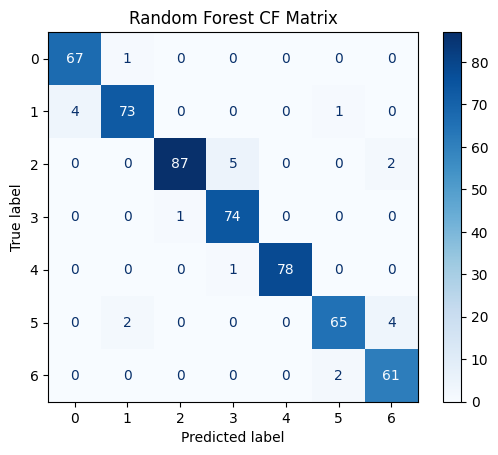

In [37]:
# Instantiate and train the Random Forest model with only 5 selected variables
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)
selected_columns = ['Gender','Height','Weight']

X_train_scale_select = X_train_scale[selected_columns]
X_test_scale_select = X_test_scale[selected_columns]

rf_model.fit(X_train_scale_select, y_train)

# Make predictions on the test set
rf_prediction = rf_model.predict(X_test_scale_select)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(f'Accuracy: {rf_accuracy}')

# Calculate F1 score
rf_weighted_f1 = f1_score(y_test, rf_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, rf_prediction, rf_model.classes_, title='Random Forest CF Matrix')

Accuracy: 0.9564393939393939


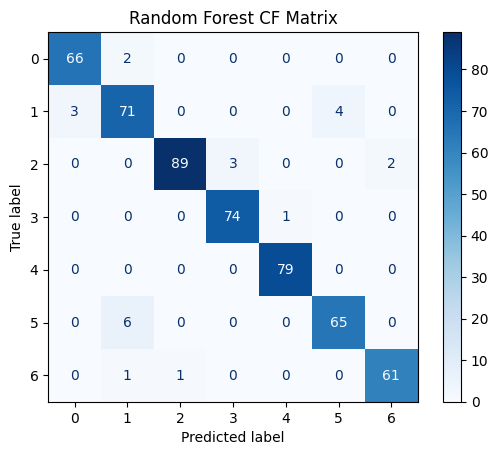

In [38]:
# Instantiate and train the Random Forest model with only 5 selected variables
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)
selected_columns = ['Height','Weight','FAVC','CH2O','TUE']

X_train_scale_select = X_train_scale[selected_columns]
X_test_scale_select = X_test_scale[selected_columns]

rf_model.fit(X_train_scale_select, y_train)

# Make predictions on the test set
rf_prediction = rf_model.predict(X_test_scale_select)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(f'Accuracy: {rf_accuracy}')

# Calculate F1 score
rf_weighted_f1 = f1_score(y_test, rf_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, rf_prediction, rf_model.classes_, title='Random Forest CF Matrix')

Accuracy: 0.9545454545454546


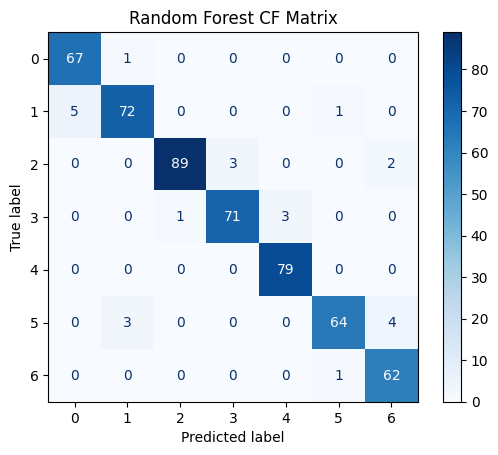

In [39]:
# Instantiate and train the Random Forest model with only 5 selected variables
rf_model = RandomForestClassifier(random_state=RANDOM_SEED)
selected_columns = ['Height','Weight']

X_train_scale_select = X_train_scale[selected_columns]
X_test_scale_select = X_test_scale[selected_columns]

rf_model.fit(X_train_scale_select, y_train)

# Make predictions on the test set
rf_prediction = rf_model.predict(X_test_scale_select)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_prediction)
print(f'Accuracy: {rf_accuracy}')

# Calculate F1 score
rf_weighted_f1 = f1_score(y_test, rf_prediction, average='weighted')

# call confusion matrix function 
plot_confusion_matrix(y_test, rf_prediction, rf_model.classes_, title='Random Forest CF Matrix')

## 7. Model Evaluation
Evaluate the best model with detailed metrics.

### Models Explored:

| Model                  | Description                                                             | Limitations                                               | Reason for Inclusion                                      |
|------------------------|-------------------------------------------------------------------------|-----------------------------------------------------------|-----------------------------------------------------------|
| **Random Forest**      | An ensemble model that builds multiple decision trees and combines them for more stable and accurate predictions. | Computationally expensive, especially with large datasets. | Robust to overfitting, captures non-linear relationships, and provides feature importance insights. |
| **Support Vector Machine (SVM)** | Finds the hyperplane that best separates classes in the feature space, maximizing the margin between classes. | Sensitive to noise, can be slow on large datasets.         | Effective for high-dimensional data and when clear class boundaries exist. |
| **Logistic Regression** | A linear model that predicts class probabilities based on feature values. | Assumes a linear relationship between features and target, may underperform on complex data. | Simple, interpretable, and computationally efficient for baseline performance comparison. |
| **Decision Tree**      | A model that splits data into decision nodes based on feature values, creating an interpretable path to classification. | Prone to overfitting without regularization or pruning.   | Easily interpretable, provides a foundation for ensemble methods like Random Forest. |


*update markdown here: https://stackedit.io/app#

### Random Forest Classification Report

In [45]:
print(classification_report(y_test, rf_prediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        68
           1       0.95      0.92      0.94        78
           2       0.99      0.95      0.97        94
           3       0.96      0.95      0.95        75
           4       0.96      1.00      0.98        79
           5       0.97      0.90      0.93        71
           6       0.91      0.98      0.95        63

    accuracy                           0.95       528
   macro avg       0.95      0.96      0.95       528
weighted avg       0.96      0.95      0.95       528

Confusion Matrix:
[[67  1  0  0  0  0  0]
 [ 5 72  0  0  0  1  0]
 [ 0  0 89  3  0  0  2]
 [ 0  0  1 71  3  0  0]
 [ 0  0  0  0 79  0  0]
 [ 0  3  0  0  0 64  4]
 [ 0  0  0  0  0  1 62]]


### SVM Classification Report

In [47]:
print(classification_report(y_test, svm_prediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        68
           1       0.71      0.83      0.76        78
           2       0.96      0.85      0.90        94
           3       0.91      0.99      0.95        75
           4       1.00      0.99      0.99        79
           5       0.80      0.75      0.77        71
           6       0.85      0.81      0.83        63

    accuracy                           0.88       528
   macro avg       0.88      0.88      0.88       528
weighted avg       0.88      0.88      0.88       528

Confusion Matrix:
[[62  6  0  0  0  0  0]
 [ 5 65  0  0  0  5  3]
 [ 0  3 80  6  0  2  3]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 1 14  0  0  0 53  3]
 [ 0  4  2  0  0  6 51]]


### Logistic Regression Classification Report

In [49]:
print(classification_report(y_test, lg_prediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lg_prediction))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        68
           1       0.85      0.58      0.69        78
           2       0.94      0.90      0.92        94
           3       0.90      0.99      0.94        75
           4       1.00      0.99      0.99        79
           5       0.74      0.75      0.74        71
           6       0.76      0.84      0.80        63

    accuracy                           0.86       528
   macro avg       0.86      0.86      0.85       528
weighted avg       0.86      0.86      0.86       528

Confusion Matrix:
[[67  1  0  0  0  0  0]
 [16 45  0  0  0 13  4]
 [ 0  0 85  7  0  0  2]
 [ 0  0  1 74  0  0  0]
 [ 0  0  0  1 78  0  0]
 [ 0  7  0  0  0 53 11]
 [ 0  0  4  0  0  6 53]]


### Decision Tree Classification Report

In [51]:
print(classification_report(y_test, dt_prediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        68
           1       0.84      0.79      0.82        78
           2       0.96      0.91      0.93        94
           3       0.95      0.96      0.95        75
           4       1.00      0.99      0.99        79
           5       0.87      0.86      0.87        71
           6       0.91      0.94      0.92        63

    accuracy                           0.91       528
   macro avg       0.91      0.92      0.91       528
weighted avg       0.92      0.91      0.91       528

Confusion Matrix:
[[65  3  0  0  0  0  0]
 [10 62  0  0  0  6  0]
 [ 0  1 86  4  0  0  3]
 [ 0  0  2 72  0  0  1]
 [ 0  0  1  0 78  0  0]
 [ 0  8  0  0  0 61  2]
 [ 0  0  1  0  0  3 59]]


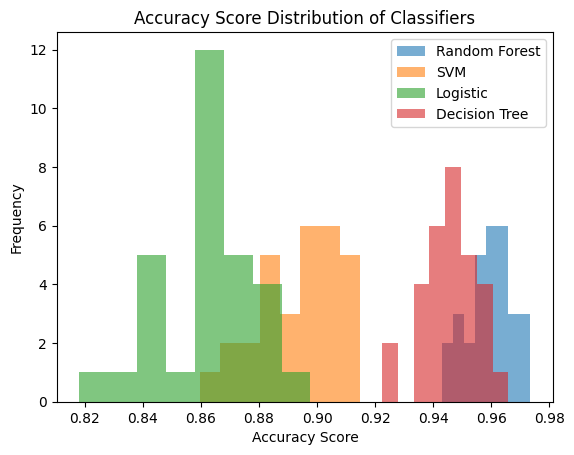

In [99]:
# NOTE: This takes a long time to run. 

i = 30 # Iterations

# Lists to store accuracy scores for each model
rf_scores = []
svm_scores = []
lg_scores = []
dt_scores = []

selected_columns = ['Height','Weight','FAVC','CH2O','TUE']


for i in range(i):
    # Splits the data into training/test sets
    _x_train, _x_test, _y_train, _y_test = train_test_split(X[selected_columns], y, test_size=0.25)

    # Standardizes training/test data
    _x_train_scaled = pd.DataFrame(scaler.fit_transform(_x_train), columns=_x_train.columns, index=_x_train.index)
    _x_test_scaled = pd.DataFrame(scaler.transform(_x_test), columns=_x_test.columns, index=_x_test.index)

    # Trains and evaluates Random Forest
    rf_model.fit(_x_train_scaled, _y_train)
    _rf_predictions = rf_model.predict(_x_test_scaled)
    _rf_score = accuracy_score(_y_test, _rf_predictions)

    # Trains and evaluates SVM 
    svm_model.fit(_x_train_scaled, _y_train)
    _svm_predictions = svm_model.predict(_x_test_scaled)
    _svm_score = accuracy_score(_y_test, _svm_predictions)

    # Trains and evaluates SVM 
    svm_model.fit(_x_train_scaled, _y_train)
    _svm_predictions = svm_model.predict(_x_test_scaled)
    _svm_score = accuracy_score(_y_test, _svm_predictions)


    #"GradientBoostingClassifier": {
    #    "model": lambda X, y: GradientBoostingClassifier(),
    #    "fit": lambda X, y: self.selectedModel.fit(X, y)
    #},

    
    # Trains and evaluates Logistic Regression 
    lg_model.fit(_x_train_scaled, _y_train)
    _lg_predictions = lg_model.predict(_x_test_scaled)
    _lg_score = accuracy_score(_y_test, _lg_predictions)

    # Trains and evaluates Decision Tree 
    dt_model.fit(_x_train_scaled, _y_train)
    _dt_predictions = dt_model.predict(_x_test_scaled)
    _dt_score = accuracy_score(_y_test, _dt_predictions)

    # Collects the scores 
    rf_scores.append(_rf_score)
    svm_scores.append(_svm_score)
    lg_scores.append(_lg_score)
    dt_scores.append(_dt_score)

# Plot histograms of the scores
plt.hist(rf_scores, bins=8, alpha=0.6, label='Random Forest')
plt.hist(svm_scores, bins=8, alpha=0.6, label='SVM')
plt.hist(lg_scores, bins=8, alpha=0.6, label='Logistic')
plt.hist(dt_scores, bins=8, alpha=0.6, label='Decision Tree')

#  Title, Labels, and Legend
plt.legend()
plt.xlabel("Accuracy Score")
plt.ylabel("Frequency")
plt.title("Accuracy Score Distribution of Classifiers")
plt.show()

## 9. Conclusion
Summarize model performance, key findings from feature importance analysis, and potential applications for public health resource allocation.

In [54]:
# TODO: Gather models results, pick the model with best accuracy and identify features to be used. 


----------------
$^{1}$ Mehrparvar, F. (2021). Obesity Levels. Kaggle. Retrieved November 9, 2024, from https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data